data: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_ori = pd.read_csv("bank-additional/bank-additional-full.csv",  sep=';')
df_ori.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df=pd.read_csv('bank_additional_full_clean_normalized.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.642226,0,2,1,0,0,0,0,5,1,...,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641,0
1,-0.196449,1,2,4,0,1,0,0,5,1,...,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641,0
2,0.093868,2,2,2,0,0,0,0,5,1,...,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641,0
3,1.642226,1,2,4,0,0,1,0,5,1,...,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641,0
4,1.932543,2,2,5,0,0,0,0,5,1,...,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641,0


In [4]:
X = df.iloc[:, 0:-1]
y = df.y

In [5]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.642226,0,2,1,0,0,0,0,5,1,0.005792,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641
1,-0.196449,1,2,4,0,1,0,0,5,1,-0.127941,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641
2,0.093868,2,2,2,0,0,0,0,5,1,-0.414513,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641
3,1.642226,1,2,4,0,0,1,0,5,1,0.181556,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641
4,1.932543,2,2,5,0,0,0,0,5,1,-0.460365,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641


In [6]:
X.pdays.max(), X.pdays.min()

(0.2118836362185938, -4.749052297919588)

In [7]:
y.head(2)

0    0
1    0
Name: y, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=101)

In [10]:
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [11]:
df_ori.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [12]:
categorical_columns_subset = [
    'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'
]

numerical_columns_subset = [
    'duration', 'campaign', 'pdays',
    'previous', 'emp.var.rate', 'cons.price.idx', 
    'cons.conf.idx', 'euribor3m', 'nr.employed'
]

X = X[categorical_columns_subset + numerical_columns_subset]
X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")

n_categorical_features = X.select_dtypes(include="category").shape[1]
n_numerical_features = X.select_dtypes(include="number").shape[1]

print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of categorical features: {n_categorical_features}")
print(f"Number of numerical features: {n_numerical_features}")

Number of samples: 30488
Number of features: 19
Number of categorical features: 10
Number of numerical features: 9


In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import seaborn as sns


one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

In [14]:
import lightgbm as lgbm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# import optuna  # pip install optuna
# from sklearn.metrics import log_loss

In [15]:
import joblib
LR_clf = joblib.load("best_logistic_regression_model_C3.sav")
LR_wt_bal_clf = joblib.load("best_logistic_regression_model_C3_balanced_wt.sav")

SVC_clf = joblib.load("best_SVC_model_one_hot_C30.sav")
SVC_wt_bal_clf = joblib.load("best_SVC_model_one_hot_C3_weight_balanced.sav")

RF_clf = joblib.load("best_random_forest_model_one_hot_n_estimators30_min_samples_leaf6.sav")
RF_wt_bal_clf = joblib.load("best_random_forest_model_one_hot_n_estimators30_min_samples_leaf3_wt_balnced.sav")

nn_clf = joblib.load("best_neural_network_model_one_hot_classifier5.sav")
lgbm_clf = joblib.load("best_lightgbm_model_one_hot_long_search_classifier.sav")

In [16]:
lgbm_wt_clf = joblib.load("best_lightgbm_model_one_hot_1000_search_is_unbalanced_classifier.sav")
lgbm_wt_clf

LGBMClassifier(bagging_fraction=0.75, bagging_freq=1, feature_fraction=0.95,
               lambda_l1=0, lambda_l2=0, learning_rate=0.05, max_depth=12,
               min_data_in_leaf=20, min_gain_to_split=0.0, n_estimators=10000,
               num_leaves=180, objective='binary')

In [17]:
RF_wt_bal_clf 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4927d9ee0>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=3, n_estimators=30))])

In [18]:
lgbm_clf

LGBMClassifier(bagging_fraction=0.8500000000000001, bagging_freq=1,
               feature_fraction=0.95, lambda_l1=0, lambda_l2=0,
               learning_rate=0.05, max_depth=7, min_data_in_leaf=20,
               min_gain_to_split=1.0, n_estimators=10000, num_leaves=30,
               objective='binary')

In [19]:
cv_macro_average_f1 = {}
cv_roc_auc_dict = {}

In [20]:
cl_rep = classification_report(y_cv, LR_clf.predict(X_cv), output_dict=True)
f1_sc = cl_rep['macro avg']['f1-score']
cv_macro_average_f1['logistic_regression_balanced_wt'] = f1_sc
print('Classification report on cross-validation data:')
print(f"logistic_regression_balanced_wt macro average f1-score: {f1_sc:.4f}\n")

Classification report on cross-validation data:
logistic_regression_balanced_wt macro average f1-score: 0.7307



In [21]:
auc_sc = roc_auc_score(y_cv, LR_clf.predict_proba(X_cv)[:, 1])
cv_roc_auc_dict['logistic_regression_balanced_wt'] = auc_sc
print(f"logistic_regression_balanced_wt roc_auc_score on cross-validation data {auc_sc:.4f}\n")

logistic_regression_balanced_wt roc_auc_score on cross-validation data 0.9215



In [22]:
cl_rep = classification_report(y_cv, SVC_clf.predict(X_cv), output_dict=True)
f1_sc = cl_rep['macro avg']['f1-score']
cv_macro_average_f1['SVC'] = f1_sc
print('Classification report on cross-validation data:')
print(f"SVC macro average f1-score: {f1_sc:.4f}\n")

Classification report on cross-validation data:
SVC macro average f1-score: 0.7411



In [23]:
auc_sc = roc_auc_score(y_cv, SVC_clf.predict_proba(X_cv)[:, 1])
cv_roc_auc_dict["SVC"] = auc_sc
print(f"SVC roc_auc_score on cross-validation data {auc_sc:.4f}\n")

SVC roc_auc_score on cross-validation data 0.9195



In [24]:
cl_rep = classification_report(y_cv, SVC_wt_bal_clf.predict(X_cv), output_dict=True)
f1_sc = cl_rep['macro avg']['f1-score']
cv_macro_average_f1['SVC_balanced_wt'] = f1_sc
print('Classification report on cross-validation data:')
print(f"SVC_balanced_wt f1-score of macro average: {f1_sc:.4f}\n")

Classification report on cross-validation data:
SVC_balanced_wt f1-score of macro average: 0.7363



In [25]:
auc_sc = roc_auc_score(y_cv, SVC_wt_bal_clf.predict_proba(X_cv)[:, 1])
cv_roc_auc_dict["SVC_balanced_wt"] = auc_sc
print(f"SVC_balanced_wt roc_auc_score on cross-validation data {auc_sc:.4f}\n")

SVC_balanced_wt roc_auc_score on cross-validation data 0.9337



In [26]:
cl_rep = classification_report(y_cv, RF_clf.predict(X_cv), output_dict=True)
f1_sc = cl_rep['macro avg']['f1-score']
cv_macro_average_f1['Random_Forest'] = f1_sc
print('Classification report on cross-validation data:')
print(f"Random_Forest f1-score of macro average: {f1_sc:.4f}\n")

Classification report on cross-validation data:
Random_Forest f1-score of macro average: 0.7620



In [27]:
auc_sc = roc_auc_score(y_cv, RF_clf.predict_proba(X_cv)[:, 1])
cv_roc_auc_dict["Random_Forest"] = auc_sc
print(f"Random_Forest roc_auc_score on cross-validation data {auc_sc:.4f}\n")

Random_Forest roc_auc_score on cross-validation data 0.9434



In [28]:
cl_rep = classification_report(y_cv, RF_wt_bal_clf.predict(X_cv), output_dict=True)
f1_sc = cl_rep['macro avg']['f1-score']
cv_macro_average_f1['Random_Forest_balanced_wt'] = f1_sc
print('Classification report on cross-validation data:')
print(f"Random_Forest_balanced_wt f1-score of macro average: {f1_sc:.4f}\n")

Classification report on cross-validation data:
Random_Forest_balanced_wt f1-score of macro average: 0.7914



In [29]:
auc_sc = roc_auc_score(y_cv, RF_wt_bal_clf.predict_proba(X_cv)[:, 1])
cv_roc_auc_dict["Random_Forest_balanced_wt"] = auc_sc
print(f"Random_Forest_balanced_wt roc_auc_score on cross-validation data {auc_sc:.4f}\n")

Random_Forest_balanced_wt roc_auc_score on cross-validation data 0.9393



In [30]:
cl_rep = classification_report(y_cv, nn_clf.predict(X_cv), output_dict=True)
f1_sc = cl_rep['macro avg']['f1-score']
cv_macro_average_f1['neural_network'] = f1_sc
print('Classification report on cross-validation data:')
print(f"Neural_network f1-score of macro average: {f1_sc:.4f}\n")

Classification report on cross-validation data:
Neural_network f1-score of macro average: 0.7876



In [31]:
auc_sc = roc_auc_score(y_cv, nn_clf.predict_proba(X_cv)[:, 1])
cv_roc_auc_dict['neural_network'] = auc_sc
print(f"Neural_network roc_auc_score on cross-validation data {auc_sc:.4f}\n")

Neural_network roc_auc_score on cross-validation data 0.9387



In [32]:
cl_rep = classification_report(y_cv, lgbm_clf.predict(X_cv), output_dict=True)
f1_sc = cl_rep['macro avg']['f1-score']
cv_macro_average_f1['Lightgbm'] = f1_sc
print('Classification report on cross-validation data:')
print(f"Lightgbm f1-score of macro average: {f1_sc:.4f}\n")

Classification report on cross-validation data:
Lightgbm f1-score of macro average: 0.7843



In [33]:
auc_sc = roc_auc_score(y_cv, lgbm_clf.predict_proba(X_cv)[:, 1])
cv_roc_auc_dict['lightgbm'] = auc_sc
print(f"Lightgbm roc_auc_score on cross-validation data {auc_sc:.4f}\n")

Lightgbm roc_auc_score on cross-validation data 0.9456



In [34]:
cl_rep = classification_report(y_cv, lgbm_wt_clf.predict(X_cv), output_dict=True)
f1_sc = cl_rep['macro avg']['f1-score']
cv_macro_average_f1['Lightgbm_balanced_wt'] = f1_sc
print('Classification report on cross-validation data:')
print(f"Lightgbm balanced weight f1-score of macro average: {f1_sc:.4f}\n")

auc_sc = roc_auc_score(y_cv, lgbm_wt_clf.predict_proba(X_cv)[:, 1])
cv_roc_auc_dict['lightgbm_balanced_wt'] = auc_sc
print(f"Lightgbm balanced weight roc_auc_score on cross-validation data {auc_sc:.4f}\n")

Classification report on cross-validation data:
Lightgbm balanced weight f1-score of macro average: 0.7713

Lightgbm balanced weight roc_auc_score on cross-validation data 0.9313



In [35]:
cv_macro_average_f1

{'logistic_regression_balanced_wt': 0.7306749387696833,
 'SVC': 0.7411168852911023,
 'SVC_balanced_wt': 0.7363202536304071,
 'Random_Forest': 0.7620394293520446,
 'Random_Forest_balanced_wt': 0.7914009378096046,
 'neural_network': 0.7875905610910476,
 'Lightgbm': 0.7842637798061275,
 'Lightgbm_balanced_wt': 0.7712625583677479}

In [36]:
cv_roc_auc_dict

{'logistic_regression_balanced_wt': 0.9214918691111363,
 'SVC': 0.9194505315180903,
 'SVC_balanced_wt': 0.9337193698003664,
 'Random_Forest': 0.9433959586786241,
 'Random_Forest_balanced_wt': 0.9392634916805863,
 'neural_network': 0.9386843609620031,
 'lightgbm': 0.9455533504694874,
 'lightgbm_balanced_wt': 0.9313286026466439}

In [37]:
test_roc_auc_dict = {}
test_macro_average_f1 = {}

In [38]:
cl_rep = classification_report(y_test, LR_clf.predict(X_test), output_dict=True)
f1_sc = cl_rep['macro avg']['f1-score']
test_macro_average_f1['logistic_regression_balanced_wt'] = f1_sc
print('Classification report on test data:')
print(f"Logistic_regression_balanced_wt macro average F1-score: {f1_sc:.4f}\n")

auc_sc = roc_auc_score(y_test, LR_clf.predict_proba(X_test)[:, 1])
test_roc_auc_dict['logistic_regression_balanced_wt'] = auc_sc
print(f"Logistic_regression_balanced_wt roc_auc_score on Test data {auc_sc:.4f}\n")

Classification report on test data:
Logistic_regression_balanced_wt macro average F1-score: 0.7228

Logistic_regression_balanced_wt roc_auc_score on Test data 0.9197



In [39]:
cl_rep = classification_report(y_test, SVC_clf.predict(X_test), output_dict=True)
f1_sc = cl_rep['macro avg']['f1-score']
test_macro_average_f1['SVC'] = f1_sc
print('Classification report on test data:')
print(f"SVC f1-score of macro average: {f1_sc:.4f}\n")

auc_sc = roc_auc_score(y_test, SVC_clf.predict_proba(X_test)[:, 1])
test_roc_auc_dict['SVC'] = auc_sc
print(f"SVC roc_auc_score on Test data {auc_sc:.4f}\n")

Classification report on test data:
SVC f1-score of macro average: 0.7323

SVC roc_auc_score on Test data 0.9167



In [40]:
cl_rep = classification_report(y_test, SVC_wt_bal_clf.predict(X_test), output_dict=True)
f1_sc = cl_rep['macro avg']['f1-score']
test_macro_average_f1['SVC_balanced_wt'] = f1_sc
print('Classification report on test data:')
print(f"SVC_balanced_wt f1-score of macro average: {f1_sc:.4f}\n")

auc_sc = roc_auc_score(y_test, SVC_wt_bal_clf.predict_proba(X_test)[:, 1])
test_roc_auc_dict['SVC_balanced_wt'] = auc_sc
print(f"SVC_balanced_wt roc_auc_score on Test data {auc_sc:.4f}\n")

Classification report on test data:
SVC_balanced_wt f1-score of macro average: 0.7395

SVC_balanced_wt roc_auc_score on Test data 0.9312



In [41]:
cl_rep = classification_report(y_test, RF_clf.predict(X_test), output_dict=True)
f1_sc = cl_rep['macro avg']['f1-score']
test_macro_average_f1['Random_Forest'] = f1_sc
print('Classification report on test data:')
print(f"Random_Forest f1-score of macro average: {f1_sc:.4f}\n")

auc_sc = roc_auc_score(y_test, RF_clf.predict_proba(X_test)[:, 1])
test_roc_auc_dict['Random_Forest'] = auc_sc
print(f"Random_Forest roc_auc_score on Test data {auc_sc:.4f}\n")

Classification report on test data:
Random_Forest f1-score of macro average: 0.7498

Random_Forest roc_auc_score on Test data 0.9395



In [42]:
cl_rep = classification_report(y_test, RF_wt_bal_clf.predict(X_test), output_dict=True)
f1_sc = cl_rep['macro avg']['f1-score']
test_macro_average_f1['Random_Forest_balanced_wt'] = f1_sc
print('Classification report on test data:')
print(f"Random_Forest_balanced_wt f1-score of macro average: {f1_sc:.4f}\n")

auc_sc = roc_auc_score(y_test, RF_wt_bal_clf.predict_proba(X_test)[:, 1])
test_roc_auc_dict['Random_Forest_balanced_wt'] = auc_sc
print(f"Random_Forest_balanced_wt roc_auc_score on Test data {auc_sc:.4f}\n")

Classification report on test data:
Random_Forest_balanced_wt f1-score of macro average: 0.7882

Random_Forest_balanced_wt roc_auc_score on Test data 0.9388



In [43]:
cl_rep = classification_report(y_test, nn_clf.predict(X_test), output_dict=True)
f1_sc = cl_rep['macro avg']['f1-score']
test_macro_average_f1['neural_network'] = f1_sc
print('Classification report on test data:')
print(f"neural_network f1-score of macro average: {f1_sc:.4f}\n")

auc_sc = roc_auc_score(y_test, nn_clf.predict_proba(X_test)[:, 1])
test_roc_auc_dict['neural_network'] = auc_sc
print(f"neural_network roc_auc_score on Test data {auc_sc:.4f}\n")

Classification report on test data:
neural_network f1-score of macro average: 0.7768

neural_network roc_auc_score on Test data 0.9335



In [44]:
cl_rep = classification_report(y_test, lgbm_clf.predict(X_test), output_dict=True)
f1_sc = cl_rep['macro avg']['f1-score']
test_macro_average_f1['lightgbm'] = f1_sc
print('Classification report on test data:')
print(f"Lightgbm f1-score of macro average: {f1_sc:.4f}\n")

auc_sc = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
test_roc_auc_dict['lightgbm'] = auc_sc
print(f"lightgbm roc_auc_score on Test data {auc_sc:.4f}\n")

Classification report on test data:
Lightgbm f1-score of macro average: 0.7720

lightgbm roc_auc_score on Test data 0.9410



In [45]:
cl_rep = classification_report(y_test, lgbm_wt_clf.predict(X_test), output_dict=True)
f1_sc = cl_rep['macro avg']['f1-score']
test_macro_average_f1['Lightgbm_balanced_wt'] = f1_sc
print('Classification report on Test data:')
print(f"Lightgbm balanced weight f1-score of macro average: {f1_sc:.4f}\n")

auc_sc = roc_auc_score(y_test, lgbm_wt_clf.predict_proba(X_test)[:, 1])
test_roc_auc_dict['lightgbm_balanced_wt'] = auc_sc
print(f"Lightgbm balanced weight roc_auc_score on Test data {auc_sc:.4f}\n")

Classification report on Test data:
Lightgbm balanced weight f1-score of macro average: 0.7635

Lightgbm balanced weight roc_auc_score on Test data 0.9265



In [46]:
test_macro_average_f1

{'logistic_regression_balanced_wt': 0.7228246929181228,
 'SVC': 0.7322999500263686,
 'SVC_balanced_wt': 0.7395463174669865,
 'Random_Forest': 0.74979320395998,
 'Random_Forest_balanced_wt': 0.788238569978529,
 'neural_network': 0.7767775891179305,
 'lightgbm': 0.7719583445564586,
 'Lightgbm_balanced_wt': 0.7634752403822398}

In [47]:
test_roc_auc_dict

{'logistic_regression_balanced_wt': 0.9196874167005539,
 'SVC': 0.916693744053514,
 'SVC_balanced_wt': 0.9311771464260767,
 'Random_Forest': 0.9395027132514462,
 'Random_Forest_balanced_wt': 0.9387815954190899,
 'neural_network': 0.9334715901462958,
 'lightgbm': 0.94104709714199,
 'lightgbm_balanced_wt': 0.9265471564852448}

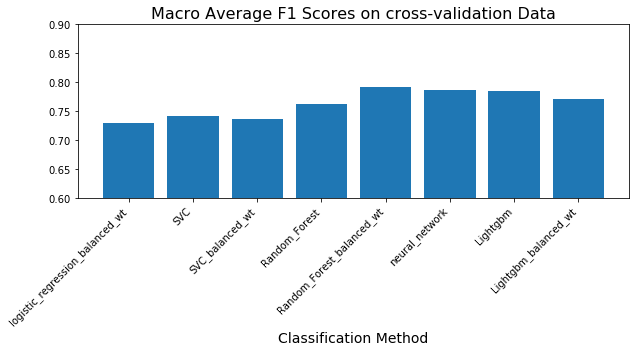

In [48]:
fig, ax = plt.subplots(figsize = (9, 5))
plt.bar(cv_macro_average_f1.keys(), cv_macro_average_f1.values())
plt.xticks(list(cv_macro_average_f1.keys()), rotation=45, ha='right')
plt.xlabel("Classification Method", fontsize=14, verticalalignment='top')
plt.ylim((0.6, 0.9))
plt.title("Macro Average F1 Scores on cross-validation Data", fontsize=16)
plt.tight_layout()
plt.savefig("images/bank_deposit_Macro_Avg_F1_scores_unbalance_trainig_data_cross_valid.png", dpi=300)

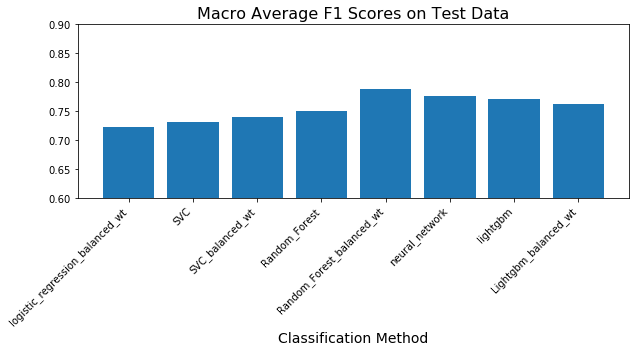

In [49]:
fig, ax = plt.subplots(figsize = (9, 5))
plt.bar(test_macro_average_f1.keys(), test_macro_average_f1.values())
plt.xticks(list(test_macro_average_f1.keys()), rotation=45, ha='right')
plt.xlabel("Classification Method", fontsize=14, verticalalignment='top')
plt.ylim((0.6, 0.9))
plt.title("Macro Average F1 Scores on Test Data", fontsize=16)
plt.tight_layout()
plt.savefig("images/bank_deposit_Macro_Avg_F1_scores_unbalance_trainig_data_test.png", dpi=300)

In [50]:
cv_roc_auc_dict

{'logistic_regression_balanced_wt': 0.9214918691111363,
 'SVC': 0.9194505315180903,
 'SVC_balanced_wt': 0.9337193698003664,
 'Random_Forest': 0.9433959586786241,
 'Random_Forest_balanced_wt': 0.9392634916805863,
 'neural_network': 0.9386843609620031,
 'lightgbm': 0.9455533504694874,
 'lightgbm_balanced_wt': 0.9313286026466439}

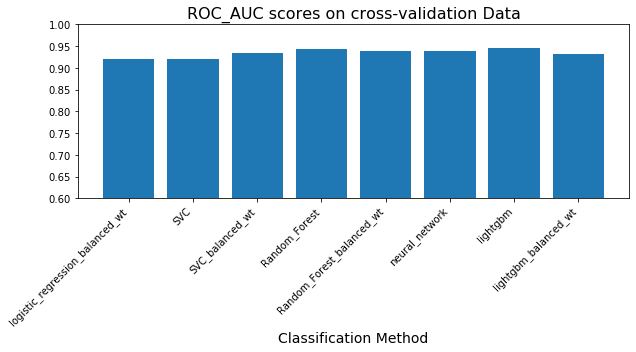

In [51]:
fig, ax = plt.subplots(figsize = (9, 5))
plt.bar(cv_roc_auc_dict.keys(), cv_roc_auc_dict.values())
plt.ylim((0.6, 1.0))
plt.xticks(list(cv_roc_auc_dict.keys()), rotation=45, ha='right')
plt.xlabel("Classification Method", fontsize=14, verticalalignment='top')
plt.title("ROC_AUC scores on cross-validation Data", fontsize=16)
plt.tight_layout()
plt.savefig("images/bank_deposit_roc_auc__scores_unbalance_trainig_data_cross_valid.png", dpi=300)

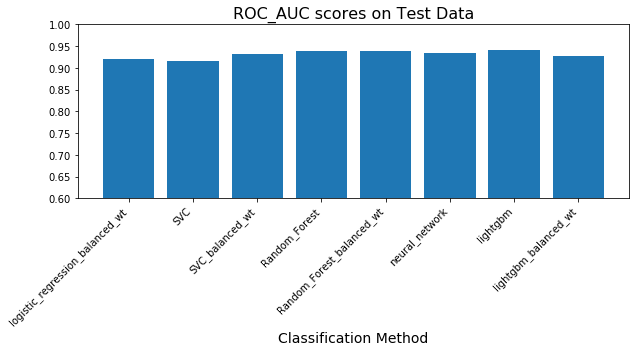

In [52]:
fig, ax = plt.subplots(figsize = (9, 5))
plt.bar(test_roc_auc_dict.keys(), test_roc_auc_dict.values())
plt.ylim((0.6, 1.0))
plt.xticks(list(test_roc_auc_dict.keys()), rotation=45, ha='right')
plt.xlabel("Classification Method", fontsize=14, verticalalignment='top')
plt.title("ROC_AUC scores on Test Data", fontsize=16)
plt.tight_layout()
plt.savefig("images/bank_deposit_roc_auc__scores_unbalance_trainig_data.png", dpi=300)

#### Random forest with balanced class weights have the best Macro Average F1 score on cv and test data. Neural network, lightgbm and random forest models have very close scores also. 

#### Lightgbm have the best roc_auc_score on cv and test data. Neural network, random forest and Random forest with balanced class weightst models have very close roc_auc_scores. 

### Used balanced data through under-sampling y=0 (no deposit subscription).  
* That has less data, Test data is different from above test or cross-validation data.  The comparison is relative

In [53]:
test_macro_average_f1['random_forest_bal_data'] = 0.78890
test_roc_auc_dict['random_forest_bal_data'] = 0.9378

In [54]:
test_macro_average_f1['logistic_regression_bal_data'] = 0.72999
test_roc_auc_dict['logistic_regression_bal_data'] = 0.92865

In [55]:
test_macro_average_f1['neural_network_bal_data'] = 0.78209
test_roc_auc_dict['neural_network_bal_data'] = 0.93920

In [56]:
test_macro_average_f1['SVM_C3_bal_data'] = 0.74330
test_roc_auc_dict['SVM_C3_bal_data'] = 0.91375

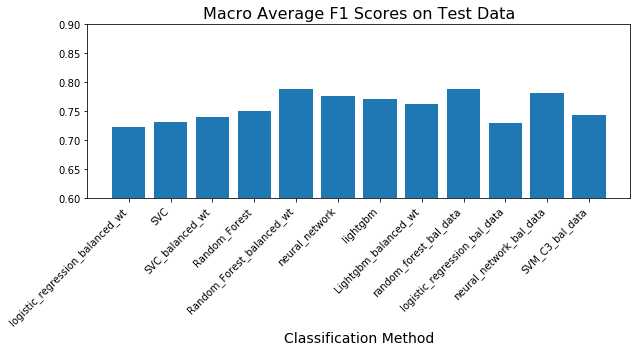

In [57]:
fig, ax = plt.subplots(figsize = (9, 5))
plt.bar(test_macro_average_f1.keys(), test_macro_average_f1.values())
plt.xticks(list(test_macro_average_f1.keys()), rotation=45, ha='right')
plt.xlabel("Classification Method", fontsize=14, verticalalignment='top')
plt.ylim((0.6, 0.9))
plt.title("Macro Average F1 Scores on Test Data", fontsize=16)
plt.tight_layout()
plt.savefig("images/bank_deposit_Macro_Avg_F1_scores_unbalance_balanced_trainig_data_test.png", dpi=300)

In [58]:
test_macro_average_f1

{'logistic_regression_balanced_wt': 0.7228246929181228,
 'SVC': 0.7322999500263686,
 'SVC_balanced_wt': 0.7395463174669865,
 'Random_Forest': 0.74979320395998,
 'Random_Forest_balanced_wt': 0.788238569978529,
 'neural_network': 0.7767775891179305,
 'lightgbm': 0.7719583445564586,
 'Lightgbm_balanced_wt': 0.7634752403822398,
 'random_forest_bal_data': 0.7889,
 'logistic_regression_bal_data': 0.72999,
 'neural_network_bal_data': 0.78209,
 'SVM_C3_bal_data': 0.7433}

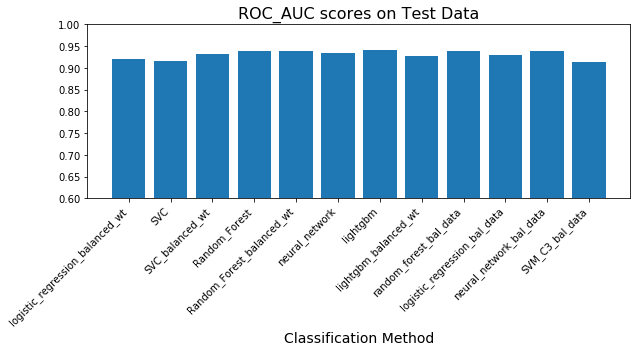

In [61]:
fig, ax = plt.subplots(figsize = (9, 5))
plt.bar(test_roc_auc_dict.keys(), test_roc_auc_dict.values())
plt.ylim((0.6, 1.0))
plt.xticks(list(test_roc_auc_dict.keys()), rotation=45, ha='right')
plt.xlabel("Classification Method", fontsize=14, verticalalignment='top')
plt.title("ROC_AUC scores on Test Data", fontsize=16)
plt.tight_layout()
plt.savefig("images/bank_deposit_roc_auc_scores_unbalance_balanced_trainig_data.png", dpi=300)

In [60]:
test_roc_auc_dict

{'logistic_regression_balanced_wt': 0.9196874167005539,
 'SVC': 0.916693744053514,
 'SVC_balanced_wt': 0.9311771464260767,
 'Random_Forest': 0.9395027132514462,
 'Random_Forest_balanced_wt': 0.9387815954190899,
 'neural_network': 0.9334715901462958,
 'lightgbm': 0.94104709714199,
 'lightgbm_balanced_wt': 0.9265471564852448,
 'random_forest_bal_data': 0.9378,
 'logistic_regression_bal_data': 0.92865,
 'neural_network_bal_data': 0.9392,
 'SVM_C3_bal_data': 0.91375}